In [1]:
import pandas as pd
import numpy as np
from itertools import chain
import patsy
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import plotly.express as px
%matplotlib inline

In [2]:
rg_outside = pd.read_csv('/stanley/robinson/ccarey/UKBB/factor_gwas/factor_analysis/cfa/FINAL_CFA/FACTOR_SCORES/OUTSIDERG_revision/rg_mat.tsv',sep="\s+",header=None).set_index(0)

In [3]:
rg_outside.index = [x.split("/")[1].split(".")[0] for x in rg_outside.index]

In [4]:
rgkey = pd.read_table('/stanley/robinson/ccarey/UKBB/factor_gwas/factor_analysis/cfa/FINAL_CFA/FACTOR_SCORES/OUTSIDERG_revision/outsiderg_key.tsv')

In [5]:
phendict = dict(zip(rgkey.filename,rgkey.phenoname))

In [6]:
rg_outside = rg_outside.loc[sorted(rg_outside.index,key=lambda e: int(e[4:]))]

In [7]:
rg_outside.index = [phendict[x] for x in rg_outside.index]

In [8]:
factor_sumstats = [os.path.basename(x) for x in glob.glob("/stanley/robinson/ccarey/UKBB/factor_gwas/factor_analysis/cfa/FINAL_CFA/FACTOR_SCORES/OUTSIDERG_revision/factor_sumstats/*")]

In [9]:
factor_sumstats = sorted(factor_sumstats)

In [10]:
factors = [x.split(".")[0] for x in factor_sumstats]

In [11]:
rg_outside.columns = factors

In [12]:
rg_outside = rg_outside[sorted(rg_outside.columns,key=lambda e: int(e[1:]))]

In [13]:
rg_outside["f4"] = rg_outside.f4*-1
rg_outside["f10"] = rg_outside.f10*-1
rg_outside["f14"] = rg_outside.f14*-1
rg_outside["f19"] = rg_outside.f19*-1
rg_outside["f23"] = rg_outside.f23*-1
rg_outside["f24"] = rg_outside.f24*-1
rg_outside["f36"] = rg_outside.f36*-1

In [14]:
rgkey = rgkey.set_index("phenoname")

In [15]:
rg_outside["category"] = [rgkey.loc[x,"category"] for x in rg_outside.index]

In [16]:
rg_outside = rg_outside.sort_values("category")

In [17]:
catbreaks = rg_outside.groupby("category")["f1"].count().cumsum().tolist()

In [18]:
catlabs = pd.DataFrame(rg_outside.groupby("category")["f1"].count()).index.tolist()

In [19]:
rg_outside = rg_outside.drop("category",axis=1)

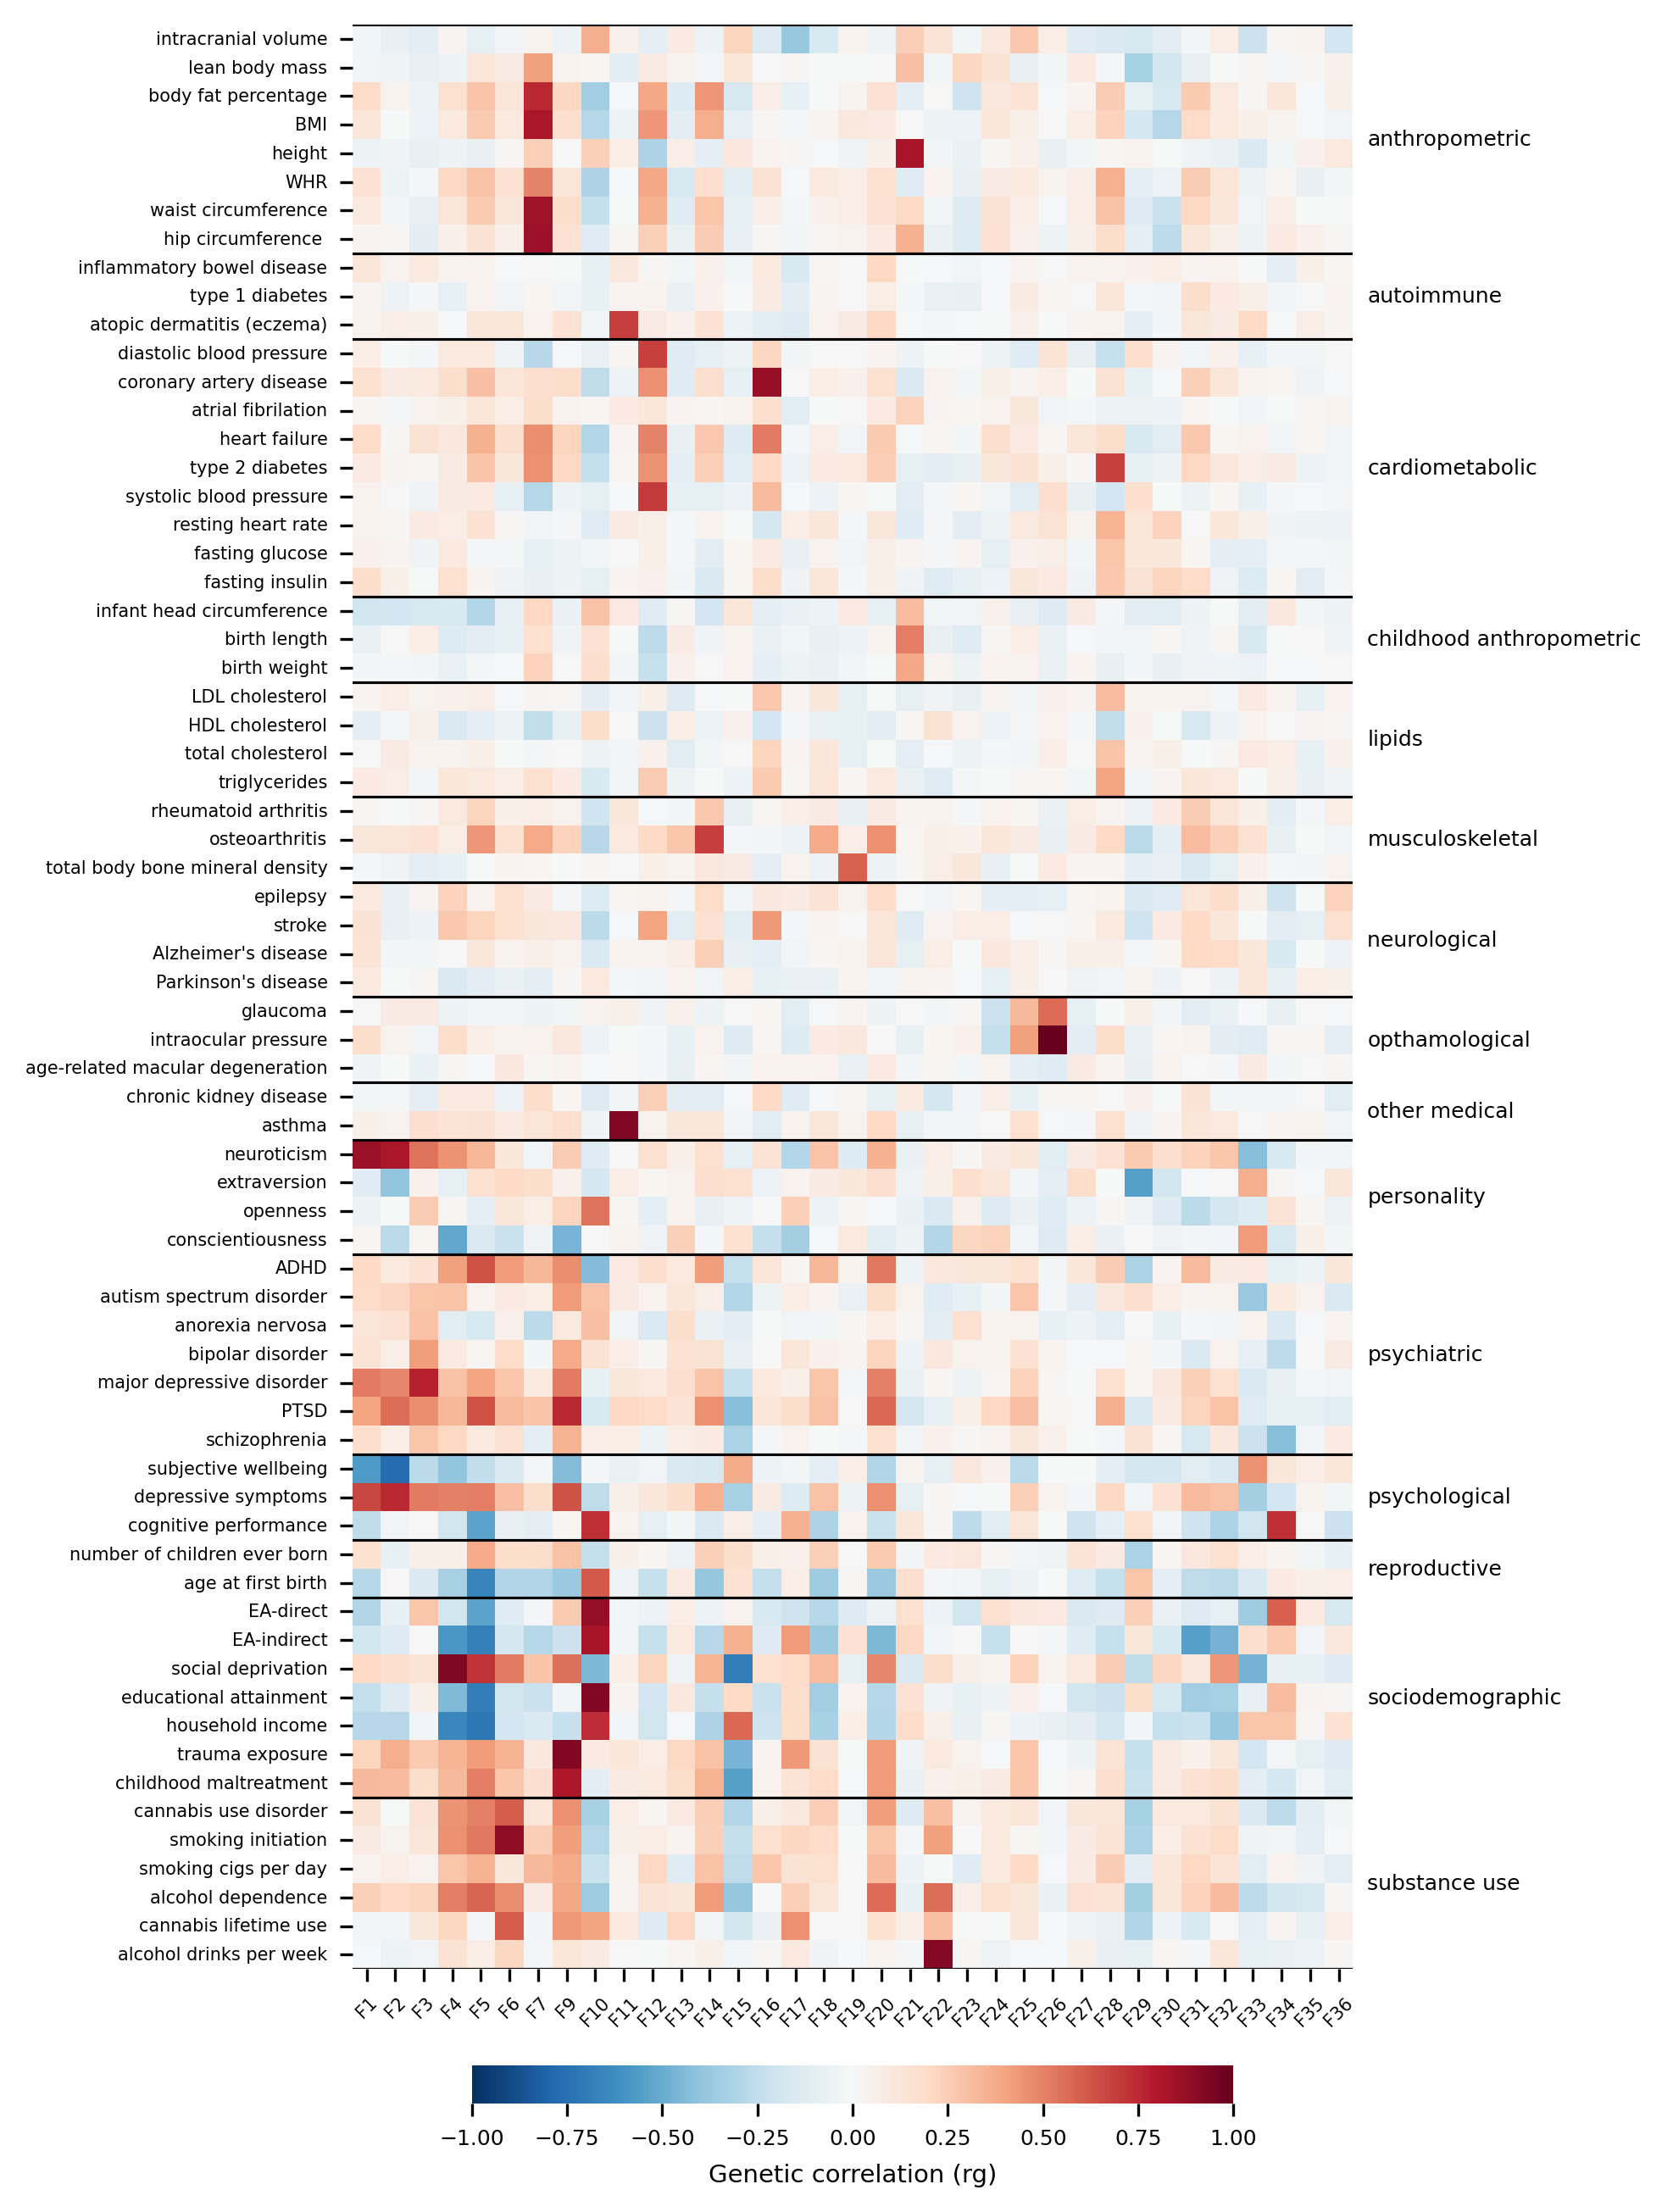

In [20]:
fig = plt.figure(figsize=(7.086, 8.858),dpi=300)
ax = sns.heatmap(rg_outside, square=True,vmax=1, vmin=-1,cmap="RdBu_r",cbar=True,cbar_kws={"shrink": 0.45, "orientation": "horizontal","pad":0.045, "fraction":0.05}, yticklabels=1)
lpos = [0]+catbreaks[:-1]
# lpos = catbreaks.copy()
for i,mybk in enumerate(catbreaks):
    plt.axhline(mybk,color="k", lw=0.75)
    # ax.text(lpos[i], 0, catlabs[i], ha='left',rotation=45,fontsize=6)
    lposmed = (lpos[i]+catbreaks[i])/2
    # catlabs[i].replace(' ','\n')
    # ax.text(35.25, lposmed, catlabs[i].strip().replace(' ','\n'), ha='left',va='center',rotation=0,fontsize=6)
    ax.text(35.5, lposmed, catlabs[i], ha='left',va='center',rotation=0,fontsize=6)
plt.axhline(0,color="k", lw=0.75)
ax.set_xticklabels([x.upper() for x in rg_outside.columns.tolist()], size=5, rotation=45, horizontalalignment='center')
plt.setp(ax.get_yticklabels(), rotation=0,fontsize=5)
ax.collections[0].colorbar.ax.tick_params(labelsize=6)
ax.collections[0].colorbar.set_label('Genetic correlation (rg)',size=7)
fig.tight_layout() 
plt.savefig("/stanley/robinson/ccarey/factor_paper_revision/edfigs_CEC/EDFig7.eps") #,bbox_inches="tight")

In [21]:
catlabs

['anthropometric',
 'autoimmune',
 'cardiometabolic',
 'childhood anthropometric ',
 'lipids',
 'musculoskeletal',
 'neurological ',
 'opthamological',
 'other medical ',
 'personality',
 'psychiatric',
 'psychological',
 'reproductive',
 'sociodemographic',
 'substance use ']